# **Naive Bayes model for HMEQ Dataset**

In [1]:
from src import utilities
from src import evaluation

from sklearn.naive_bayes import GaussianNB

hmeq_dataset_path = '../../../datasets/preprocessed/hmeq/'

2023-03-12 20:25:32.595332: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 20:25:33.153900: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-12 20:25:33.153945: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-12 20:25:33.153950: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Model save_path: ../../../models/GNB/2023-03-12_20-25-33
Selected Features: ['debt-to-income', 'curr-prop-val', 'oldest-credit-line', 'loan-amount', 'job', 'credit-inquiries', 'credit-lines', 'existing-amount-due', 'years-at-job', 'derogatories', 'loan-reason']


5it [00:00, 55.18it/s]


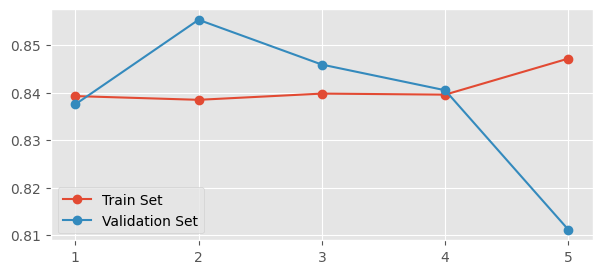

Average Train Set Accuracy: 0.8408659274893285
Average Validation Set Accuracy: 0.8380821019796251


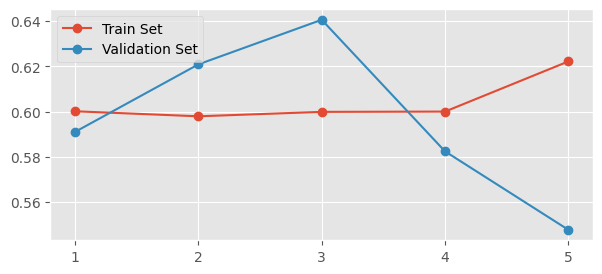

Average Train Set F1 Score: 0.6040150657832565
Average Validation Set F1 Score: 0.5965302435153512


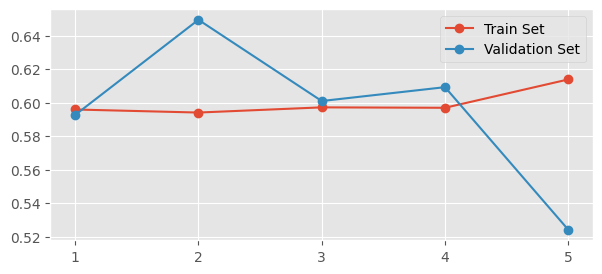

Average Train Set Precision: 0.5995420264005448
Average Validation Set Precision: 0.5952338349957774


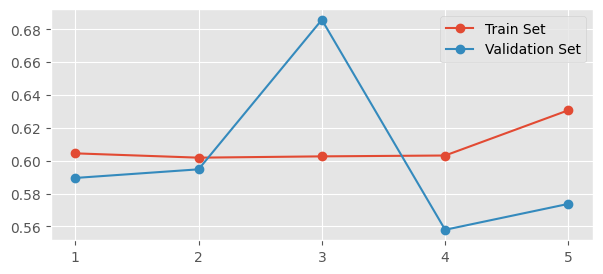

Average Train Set Recall: 0.6085683657237706
Average Validation Set Recall: 0.6003306696059519


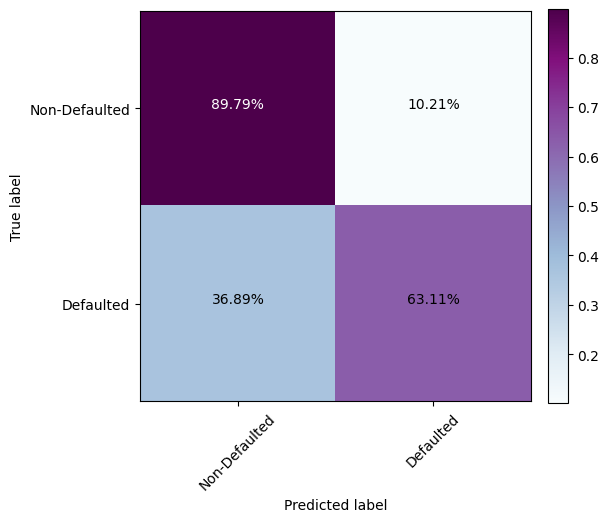

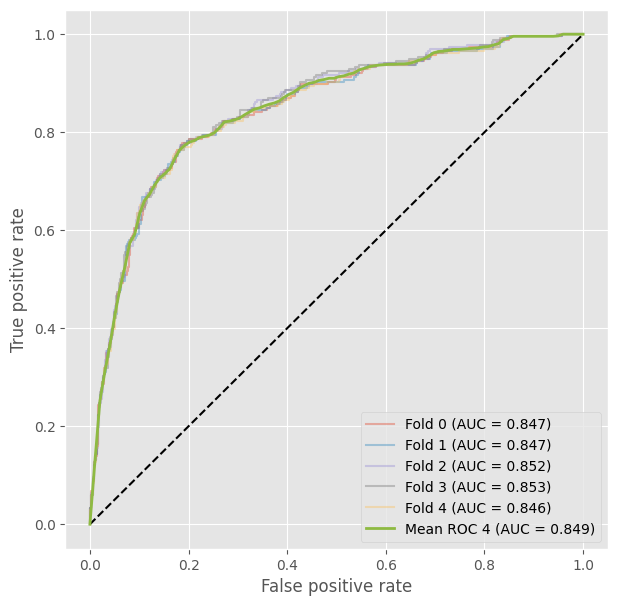

Gini derived from mean AUC 0.6977336389101094


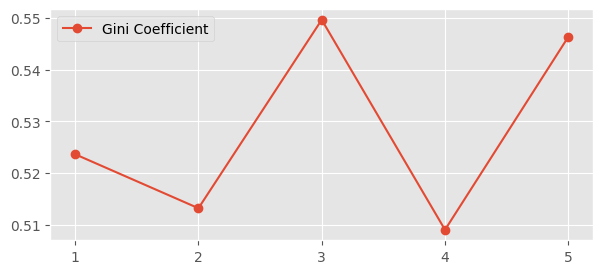

Average Gini Coefficient: 0.5283811637862694


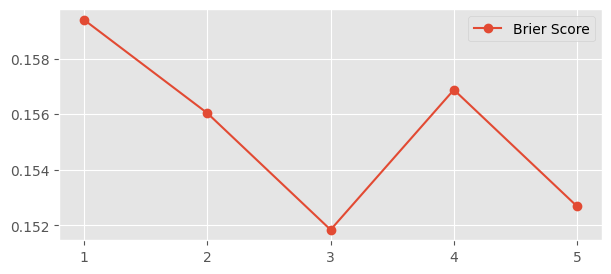

Average Brier Score: 0.1553691275167785


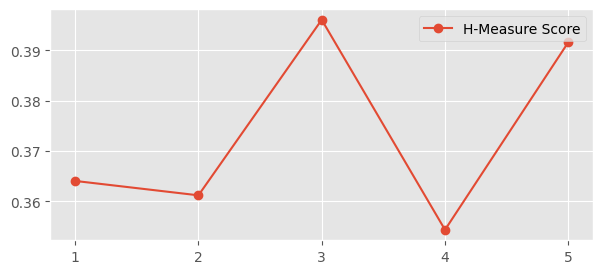

Average H-Measure Score: 0.3734680059929764


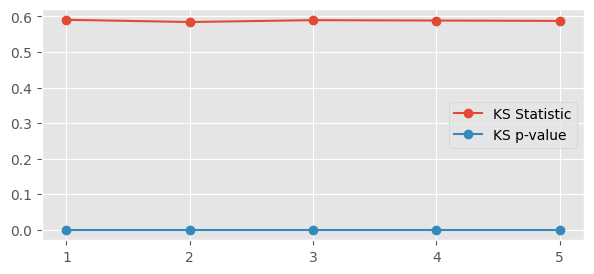

Average Kolmogorov-Smirnov Statistic: 0.5882053450310942
Average Kolmogorov-Smirnov p-value: 7.631974407431736e-62


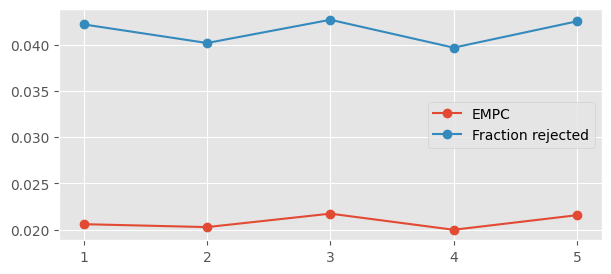

Average EMP: 0.02082789150263501
Average EMP Fractions: 0.041439068059997294


In [2]:
features_scores = utilities.read_features_scores(hmeq_dataset_path)
train_data = utilities.read_parquet(hmeq_dataset_path + 'train.parquet')
test_data = utilities.read_parquet(hmeq_dataset_path + 'test.parquet')

gnbc = GaussianNB()

evaluation.k_fold_cross_validate(model=gnbc, train_data=train_data,
                                 test_data=test_data, target='defaulted',
                                 classes=['Non-Defaulted', 'Defaulted'],
                                 k_folds=5, features_scores=features_scores,
                                 features=11, model_name='GNB', learning_rate=None,
                                 epochs=None, batch_size=None, verbose=False)